# Setup

In [29]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect('sample_data/supply_company.db')

# 1. Get data


In [30]:
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type = 'table'", conn)
tables

,name
0,Customers
1,Orders


Largest Customer ID

In [31]:
orders = pd.read_sql("SELECT * FROM Orders", conn)
largest_cust = orders.groupby("Customer_Number").sum()['amount'].sort_values(ascending = False).index[0]
largest_cust

<ipython-input-31-75b4dc58388e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  largest_cust = orders.groupby("Customer_Number").sum()['amount'].sort_values(ascending = False).index[0]


35549

Largest Customer Info

In [32]:
largest_cust_info = pd.read_sql("SELECT * from Customers WHERE Customer_Number = " + str(largest_cust), conn)
largest_cust_info

,index,Customer_Number,Company,City,State
0,5,35549,Certain Construction,Honolulu,HI


In [37]:
# Perform a join operation based on the Customer_Number column
orders = pd.read_sql("SELECT * FROM Orders", conn)
customers = pd.read_sql("SELECT * FROM Customers", conn)
merged_df = pd.merge(orders, customers, on='Customer_Number')

orders

,index,Customer_Number,date,item,qty,price,amount
0,0,25058,10/19/2020,354161666,62,91.50,5673.14
1,1,25058,11/10/2020,1129038342,38,79.79,3032.14
2,2,26069,11/23/2020,421919566,40,55.67,2226.76
3,3,26069,12/22/2020,1156861472,54,80.30,4336.03
4,4,26858,11/30/2020,936049686,64,45.37,2903.99
5,5,26858,12/9/2020,458515506,54,15.55,839.51
6,6,26858,11/6/2020,937462037,83,44.92,3728.20
7,7,31782,10/21/2020,1056009661,17,38.95,662.14
8,8,31782,12/23/2020,1345493738,61,46.32,2825.78
9,9,31782,10/6/2020,959143459,73,57.57,4202.92


In [38]:
customers

,index,Customer_Number,Company,City,State
0,0,25058,Path Construction,Seattle,WA
1,1,26069,Big Lift Construction,Boise,ID
2,2,26858,Primary Supply,Dallas,TX
3,3,31782,Foresight Construction,St. Petersburg,FL
4,4,32791,Aspire Construction,Miami,FL
5,5,35549,Certain Construction,Honolulu,HI
6,6,37139,Accelerate Your Supply,Huntington,NY
7,7,37179,Construction Recovery and Renew,Jersey City,NJ
8,8,39513,Building Capacity,Long Beach,CA
9,9,41085,Opportune SupplyClick to check domain availabi...,Santa Ana,CA


In [39]:
merged_df

,index_x,Customer_Number,date,item,qty,price,amount,index_y,Company,City,State
0,0,25058,10/19/2020,354161666,62,91.50,5673.14,0,Path Construction,Seattle,WA
1,1,25058,11/10/2020,1129038342,38,79.79,3032.14,0,Path Construction,Seattle,WA
2,2,26069,11/23/2020,421919566,40,55.67,2226.76,1,Big Lift Construction,Boise,ID
3,3,26069,12/22/2020,1156861472,54,80.30,4336.03,1,Big Lift Construction,Boise,ID
4,4,26858,11/30/2020,936049686,64,45.37,2903.99,2,Primary Supply,Dallas,TX
5,5,26858,12/9/2020,458515506,54,15.55,839.51,2,Primary Supply,Dallas,TX
6,6,26858,11/6/2020,937462037,83,44.92,3728.20,2,Primary Supply,Dallas,TX
7,7,31782,10/21/2020,1056009661,17,38.95,662.14,3,Foresight Construction,St. Petersburg,FL
8,8,31782,12/23/2020,1345493738,61,46.32,2825.78,3,Foresight Construction,St. Petersburg,FL
9,9,31782,10/6/2020,959143459,73,57.57,4202.92,3,Foresight Construction,St. Petersburg,FL


# Data Visualization

In [51]:
# Calculate the total spending for each customer
customer_spending = merged_df.groupby('Customer_Number')['amount'].sum()

# Sort the customers by their total spending in descending order
customer_spending = customer_spending.sort_values(ascending=False)

# Get the customer names from the 'Company' column
customer_names = customers.set_index('Customer_Number')['Company']

# Create a new Series with customer names based on the customer_spending index
customer_names_series = customer_names.loc[customer_spending.index]

# Create a new DataFrame with customer spending and name
customer_spending_df = pd.DataFrame({'Customer_Number': customer_spending.index, 'Total_Spending': customer_spending.values, 'Customer_Name': customer_names_series.values})

customer_spending_df.loc[customer_spending_df['Customer_Name'] == '41085', 'Customer_Name'] = 'Opportune SupplyClick to check domain availability.'


# Display the updated DataFrame
customer_spending_df

,Customer_Number,Total_Spending,Customer_Name
0,35549,12462.79,Certain Construction
1,39513,10970.88,Building Capacity
2,32791,10596.64,Aspire Construction
3,37179,9688.11,Construction Recovery and Renew
4,37139,9070.91,Accelerate Your Supply
5,25058,8705.28,Path Construction
6,43711,8057.30,Supply Solutions
7,31782,7690.84,Foresight Construction
8,26858,7471.70,Primary Supply
9,26069,6562.79,Big Lift Construction


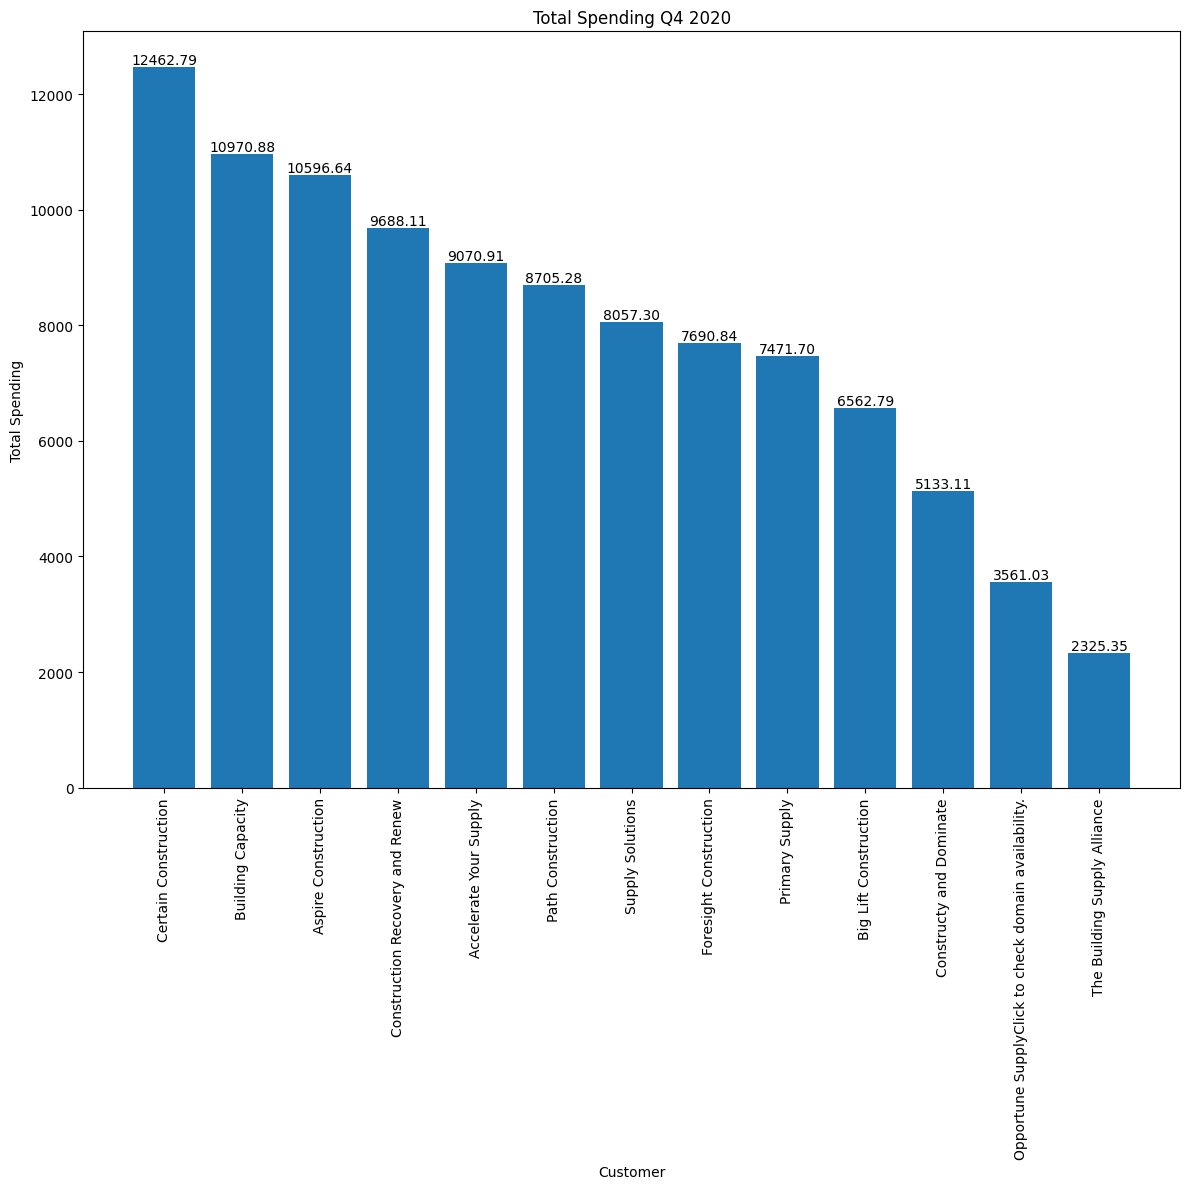

In [55]:

# Sort the customers by their total spending in descending order
customer_spending_sorted = customer_spending_df.sort_values('Total_Spending', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 12))
bars = plt.bar(customer_spending_sorted['Customer_Name'], customer_spending_sorted['Total_Spending'])
plt.xlabel('Customer')
plt.ylabel('Total Spending')
plt.title('Total Spending Q4 2020')
plt.xticks(rotation=90)

# Add spending amount labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()